In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(26)
torch.manual_seed(26)

In [2]:
DEVICE = 'cuda:0'
MAX_EPOCHS = 100
EXPECTED_N = [2000,2000,4000,15000]

## Torus model

In [3]:
def simulator(z, center = np.array([0.6, 0.8])):
    r = sum((z[:2]-center)**2)**0.5  # Return radial distance from center
    x = np.array([z[0], r, z[2]])
    return x

def noise(x, z = None, noise = np.array([0.03, 0.005, 0.2])):
    n = np.random.randn(*x.shape)*noise
    return x + n

z0 = np.array([0.57, 0.8, 1.0])
zdim = len(z0)
x0 = simulator(z0)  # Using Asimov data

In [4]:
cache = swyft.MemoryCache(zdim = zdim, xshape = x0.shape)

Creating new cache.


## Inference

In [5]:
intensity = None

for i in range(4):
    if intensity is None:
        intensity = swyft.get_unit_intensity(expected_n=EXPECTED_N[i], dim=zdim)
    else:
        intensity = swyft.get_constrained_intensity(
            expected_n=EXPECTED_N[i],
            ratio_estimator=re,
            x0=x0,
            threshold=1e-4,
        )
    cache.grow(intensity)
    cache.simulate(simulator)
    points = swyft.Points(cache, intensity, noise)
    re = swyft.RatioEstimator(points, device=DEVICE)
    re.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4])

Simulate:  11%|█         | 221/1975 [00:00<00:00, 2203.96it/s]

Adding 1975 new samples. Run simulator!


Simulate: 100%|██████████| 1975/1975 [00:00<00:00, 2698.89it/s]


yshape (shape of features between head and legs): 3
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 40.570823192596436
Validation loss: 30.850385665893555
Validation loss: 28.726173400878906
Validation loss: 29.35826873779297
Total epochs: 4
LR iteration 1
Validation loss: 27.859126567840576
Validation loss: 27.48439121246338
Validation loss: 26.617252826690674
Validation loss: 27.181623935699463
Total epochs: 4
LR iteration 2
Validation loss: 27.377477645874023
Validation loss: 26.46117401123047
Validation loss: 25.9639630317688
Validation loss: 26.51464080810547
Total epochs: 4


Simulate:  20%|█▉        | 331/1666 [00:00<00:00, 3304.57it/s]

Constrained posterior area: 0.19229078652589743
Adding 1666 new samples. Run simulator!


Simulate: 100%|██████████| 1666/1666 [00:00<00:00, 3274.21it/s]


yshape (shape of features between head and legs): 3
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 41.010244369506836
Validation loss: 36.95721387863159
Validation loss: 37.70576524734497
Total epochs: 3
LR iteration 1
Validation loss: 36.63904428482056
Validation loss: 36.841094970703125
Total epochs: 2
LR iteration 2
Validation loss: 36.57971382141113
Validation loss: 35.57930278778076
Validation loss: 36.21850633621216
Total epochs: 3


Simulate:  15%|█▍        | 335/2258 [00:00<00:00, 3349.49it/s]

Constrained posterior area: 0.15756555908214942
Adding 2258 new samples. Run simulator!


Simulate: 100%|██████████| 2258/2258 [00:00<00:00, 2685.53it/s]


yshape (shape of features between head and legs): 3
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 85.13170766830444
Validation loss: 79.12158870697021
Validation loss: 76.71697235107422
Validation loss: 75.99357414245605
Validation loss: 73.60963439941406
Validation loss: 74.59709405899048
Total epochs: 6
LR iteration 1
Validation loss: 72.21228694915771
Validation loss: 73.84319972991943
Total epochs: 2
LR iteration 2
Validation loss: 73.88711166381836
Validation loss: 73.99259233474731
Total epochs: 2


Simulate:   3%|▎         | 328/12006 [00:00<00:03, 3270.91it/s]

Constrained posterior area: 0.11667282805062401
Adding 12006 new samples. Run simulator!


Simulate: 100%|██████████| 12006/12006 [00:03<00:00, 3076.43it/s]


yshape (shape of features between head and legs): 3
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 286.08451414108276
Validation loss: 283.8834295272827
Validation loss: 273.00840520858765
Validation loss: 283.4236364364624
Total epochs: 4
LR iteration 1
Validation loss: 263.8136034011841
Validation loss: 264.63493824005127
Total epochs: 2
LR iteration 2
Validation loss: 262.89233207702637
Validation loss: 261.44962549209595
Validation loss: 260.723557472229
Validation loss: 255.26852369308472
Validation loss: 256.8042984008789
Total epochs: 5


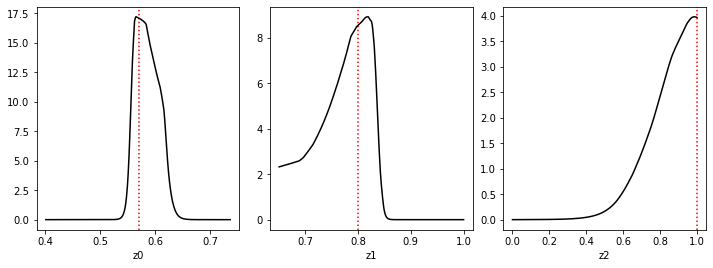

In [6]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (12, 4),max_n_points=10000);

In [7]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1], [0, 2], [1, 2]], device=DEVICE)

yshape (shape of features between head and legs): 3


In [8]:
re2.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4])

Start training
LR iteration 0
Validation loss: 238.18450355529785
Validation loss: 226.7090358734131
Validation loss: 213.20263409614563
Validation loss: 202.34441924095154
Validation loss: 194.02866172790527
Validation loss: 190.58280491828918
Validation loss: 195.53216290473938
Total epochs: 7
LR iteration 1
Validation loss: 183.2703366279602
Validation loss: 177.41812109947205
Validation loss: 180.453773021698
Total epochs: 3
LR iteration 2
Validation loss: 172.6096968650818
Validation loss: 176.91132402420044
Total epochs: 2


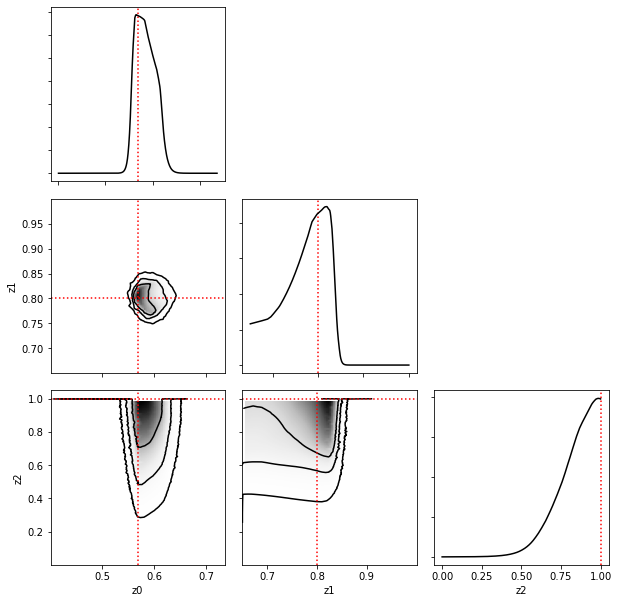

In [9]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10,max_n_points=10000)